# Sensitivity analysis

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def gen_range(mini, maxi, percentage, number=1):
    if percentage < 1.0:
        h = (maxi - mini) * percentage
        l = np.random.uniform(mini, maxi-h, number).tolist()
        return list(map(lambda x: (x, x + h), l))
    else:
        return [(mini, maxi) for i in range(number)]

# def query_gen(agg_funs, mini, maxi, percentage):
#     agg_fun = agg_funs[np.random.randint(len(agg_funs))]
#     a, b = gen_range(mini, maxi, percentage)
#     return agg_fun, a, b

## Build queries

In [26]:
af = ["COUNT", "SUM", "AVG"]
mini = 1.0
maxi = 200.0
mini, maxi

(1.0, 200.0)

In [38]:
queries_per_af = 15
range_percent = 0.1
queries = {
    af[0]: gen_range(mini, maxi, range_percent, queries_per_af),
    af[1]: gen_range(mini, maxi, range_percent, queries_per_af),
    af[2]: gen_range(mini, maxi, range_percent, queries_per_af)
}
  
# Writing to sample.json 
json_queries = json.dumps(queries) 
with open("../../../experiments/sensitivity_analysis_sampleSize_queries.json", "w") as outfile: 
    outfile.write(json_queries) 

## Query range queries

In [28]:
queries_per_af = 15
#####
range_percent = 0.001
#####
queries = {
    af[0]: gen_range(mini, maxi, range_percent, queries_per_af),
    af[1]: gen_range(mini, maxi, range_percent, queries_per_af),
    af[2]: gen_range(mini, maxi, range_percent, queries_per_af)
}
  
# Writing to sample.json 
json_queries = json.dumps(queries) 
with open("../../../experiments/sensitivity_analysis_queryRange{}_queries.json".format(range_percent), "w") as outfile: 
    outfile.write(json_queries) 
    
    

# Query Analysis

## Start and End

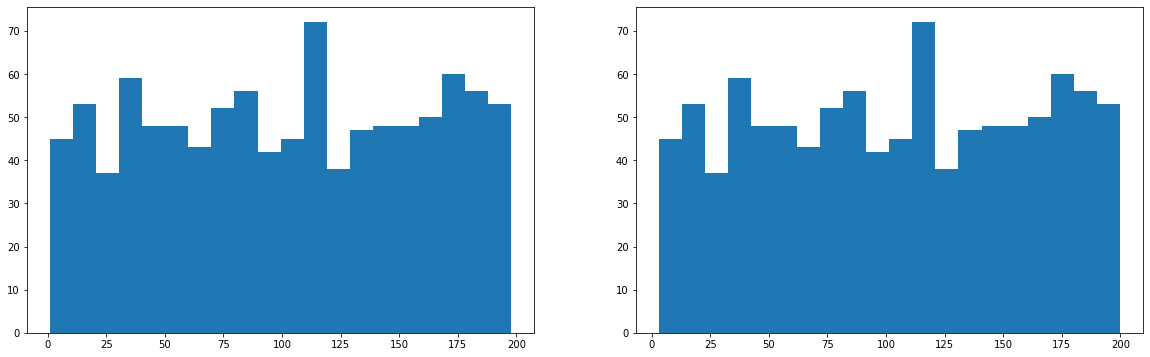

In [33]:
l = gen_range(mini, maxi, 0.01, 1000)
start = list(map(lambda x: x[0], l))
end = list(map(lambda x: x[1], l))
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].hist(start, bins = 20)
axes[1].hist(end, bins=20)
plt.show()

## Range

In [34]:
l = gen_range(mini, maxi, range_percent, 10)
ranges = list(map(lambda x: x[1] - x[0], l))
ranges

[0.19899999999999807,
 0.19900000000001228,
 0.19899999999999807,
 0.19899999999999807,
 0.19900000000001228,
 0.19899999999999807,
 0.19900000000000162,
 0.19899999999999807,
 0.19900000000001228,
 0.19900000000001228]